In [ ]:
!pip install networkx
!pip install matplotlib

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
l = 4
lattice = nx.Graph()
lattice.add_nodes_from([(n, m) for n in range(2*l) for m in range(2*l)])
# lattice.add_edges_from([((2*n, m), (2*n, m+1)) for n in range(l) for m in range(2*l-2)] +
                        # [((n, 2*m), (n+1, 2*m)) for n in range(2*l-2) for m in range(l)])
lattice.add_edges_from([((n, m), (n, (m+1)%(2*l))) for n in range(2*l) for m in range(2*l)] +
                         [((n, m), ((n+1)%(2*l) ,m)) for n in range(2*l) for m in range(2*l)])

qubit_coordinates = [(2*n, 2*m+1) for n in range(l) for m in range(l)] + [(2*n+1, 2*m) for n in range(l) for m in range(l)]
vertex_coordinates = [(2*n, 2*m) for n in range(l) for m in range(l)] 
lattice_qubits = lattice.subgraph(qubit_coordinates)
lattice_vis = lattice.subgraph(qubit_coordinates + vertex_coordinates)

num_phys_qubits = len(lattice_qubits.nodes())
print(f"Number of physical qubits needed = {num_phys_qubits}")


Number of physical qubits needed = 32


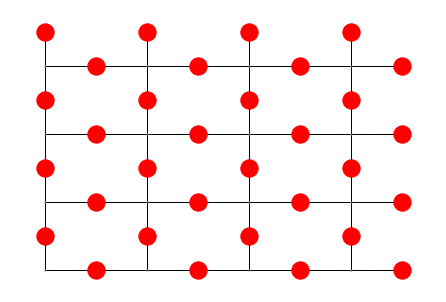

In [31]:
pos = {(x,y):(y,x) for x,y in lattice.nodes()}
# nx.draw(lattice, pos=pos, node_size = 3)
nx.draw(lattice_vis, pos=pos, node_size = 1)
nx.draw(lattice_qubits, pos=pos, node_color = 'r')